# This imports the drive module from google.colab to mount Google Drive in Colab. It allows you to access files stored in Google Drive.

In [63]:
from google.colab import drive

# Mounts Google Drive to Colab at /content/drive.

In [64]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sets the file path to a folder in your Google Drive.

In [65]:
path = '/content/drive/MyDrive/SuLiFa'

# Imports necessary libraries

In [66]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Loads training and validation datasets:

train_dataset: Loads training data with 80% of images.
test_dataset: Loads validation data with 20% of images.
Resizes images to 224x224 and assigns labels as integers.
Splits data with validation_split and seed ensures reproducibility.

In [67]:
train_dataset = image_dataset_from_directory(
    path,
    label_mode = 'int',
    image_size = (224,224),
    batch_size = 32,
    subset = "training",
    validation_split = 0.2,
    seed = 123
)
test_dataset = image_dataset_from_directory(
    path,
    label_mode = 'int',
    image_size = (224,224),
    batch_size = 32,
    subset = "validation",
    validation_split = 0.2,
    seed = 123
)

Found 2717 files belonging to 3 classes.
Using 2174 files for training.
Found 2717 files belonging to 3 classes.
Using 543 files for validation.


# Takes one batch from train_dataset

Prints the shape of the image batch and label batch.
Breaks after the first iteration to avoid processing more than one batch.

In [68]:
for image , label in train_dataset.take(1):
  print(f"image : {image.shape}")
  print(f"label : {label.shape}")
  break

image : (32, 224, 224, 3)
label : (32,)


# Displays the first 25 images from the dataset

images[0][i] retrieves an image.
labels[0][i] shows the corresponding label.
Converts images to uint8 format for proper display.
Arranges images in a 5x5 grid using subplot.

In [70]:
images = []
labels = []
count = 0
for image , label in train_dataset.take(1):
  if count == 25:
    break
  images.append(image)
  labels.append(label)
  count += 1

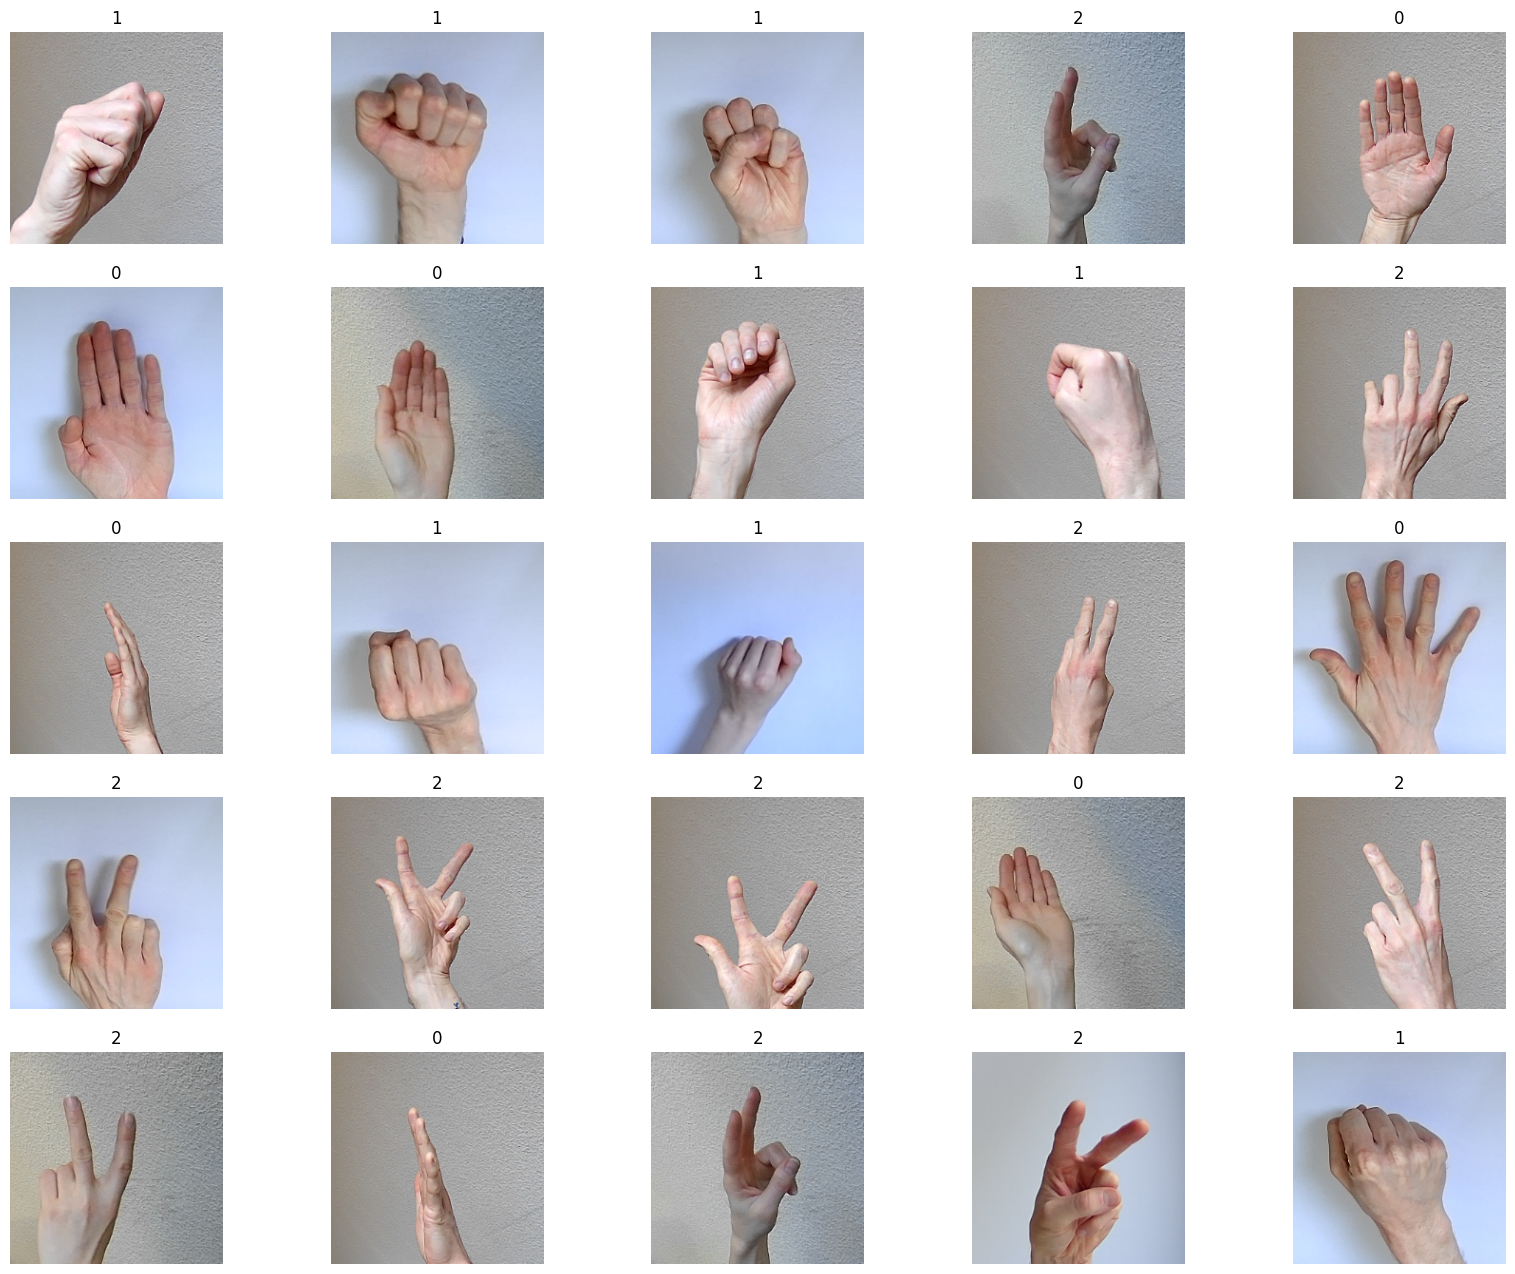

In [71]:
plt.figure(figsize = (20,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow((images[0][i].numpy()).astype('uint8'))
  plt.title(str(labels[0][i].numpy()))
  plt.axis("off")
plt.show()

# Loads the pre-trained ResNet50 model

In [85]:
base_model = keras.applications.ResNet50(weights = "imagenet" , include_top = False , classes =3)

weights="imagenet": Uses ImageNet pre-trained weights.
include_top=False: Excludes the final fully connected layer.
classes=3: Specifies the number of output classes (for your case, 3 classes).

In [86]:
print(base_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


# Freezes the layers of the pre-trained base_model (ResNet50)

In [92]:
for layer in base_model.layers:
  layer.trainable = False

layer.trainable = False: Prevents training of ResNet layers. Builds a new model:
Adds a GlobalAveragePooling2D layer to reduce spatial dimensions.
Adds a Dense layer with 128 units and ReLU activation.
Adds an output layer with 3 units and softmax activation for classification.

In [88]:
model = keras.models.Sequential([
    base_model,

    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dense(128 , activation = "relu"),

    keras.layers.Dense(3 , activation = "softmax")
])

# Compile the model

In [89]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , metrics = ["accuracy"] , optimizer = keras.optimizers.Adam(learning_rate = 0.001))

# Defines a preprocessing function

In [76]:
def preprocess(image , label):
  label = to_categorical(label , num_classes = 3)
  return image , label
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [91]:
for image , label in train_dataset.take(1):
  print(f"label : {label.shape}")
  print(label[:5])
  break
for image , label in test_dataset.take(1):
  print(f"label : {label.shape}")
  print(label[:5])
  break

label : (32, 3)
tf.Tensor(
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]], shape=(5, 3), dtype=float32)
label : (32, 3)
tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]], shape=(5, 3), dtype=float32)


# Imports EarlyStopping callback

Monitors val_loss during training.
Stops training after 5 epochs with no improvement (patience=5).
Restores the best model weights when training stops (restore_best_weights=True).

In [93]:
from keras.callbacks import EarlyStopping

In [94]:
early_stopping = EarlyStopping(monitor = "val_loss" , patience = 5 , restore_best_weights = True)

# Trains the model:

In [97]:
hist = model.fit(train_dataset , epochs = 3 , verbose = 2, shuffle = True, validation_data = (test_dataset) , callbacks = [early_stopping])

Epoch 1/3
68/68 - 592s - 9s/step - accuracy: 0.9986 - loss: 0.0126 - val_accuracy: 0.9963 - val_loss: 0.0141
Epoch 2/3
68/68 - 503s - 7s/step - accuracy: 0.9991 - loss: 0.0086 - val_accuracy: 0.9982 - val_loss: 0.0176
Epoch 3/3
68/68 - 603s - 9s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9963 - val_loss: 0.0116


# Saves the trained model

In [106]:
save_path = '/content/drive/MyDrive/MyModels/SuLiFa.h5'
model.save(save_path)

# Evaluate the model

In [99]:
model.evaluate(test_dataset)

17/17 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.9953 - loss: 0.0148


[0.011620869860053062, 0.9963167309761047]

# Plots training and validation metrics

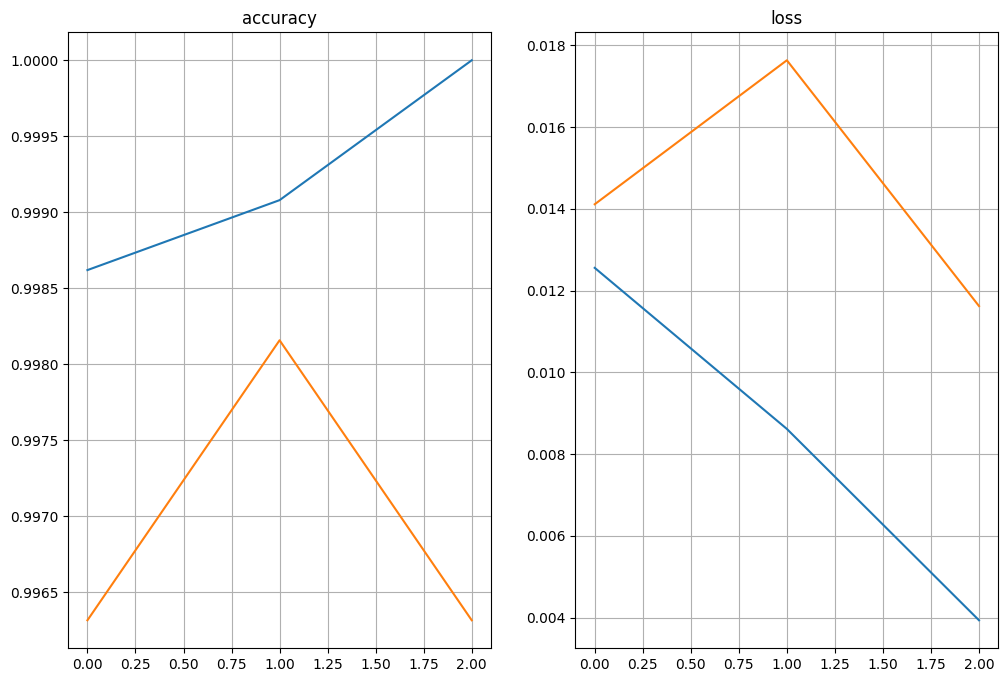

In [98]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'] , label = "Train accuracy")
plt.plot(hist.history['val_accuracy'] , label = "Val accuracy")
plt.grid()
plt.title("accuracy")

plt.subplot(1,2,2)
plt.plot(hist.history['loss'] , label = "Train loss")
plt.plot(hist.history['val_loss'] , label = "Val loss")
plt.grid()
plt.title("loss")

plt.show()

# Check our model on test dataset

The code selects 10 images from the test dataset, makes predictions using the trained model, and compares predicted labels with real labels. It then displays the images in a 5x5 grid with their predicted class names (paper, rock, or scissors).

In [100]:
rps_map = {
    0: "paper",
    1: "rock",
    2: "scissors"
}

In [101]:
check_images = []
labels = []
count = 0
for image , label in test_dataset.take(1):
  if count == 10:
    break
  check_images.append(image)
  labels.append(label)
  count += 1

In [102]:
predictions = model.predict(check_images)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_710
Received: inputs=('Tensor(shape=(32, 224, 224, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [122]:
pred = [np.argmax(i) for i in predictions]
pred_real = [np.argmax(i) for i in labels[0]]

print(pred)
print(pred_real)

[2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1]
[2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1]


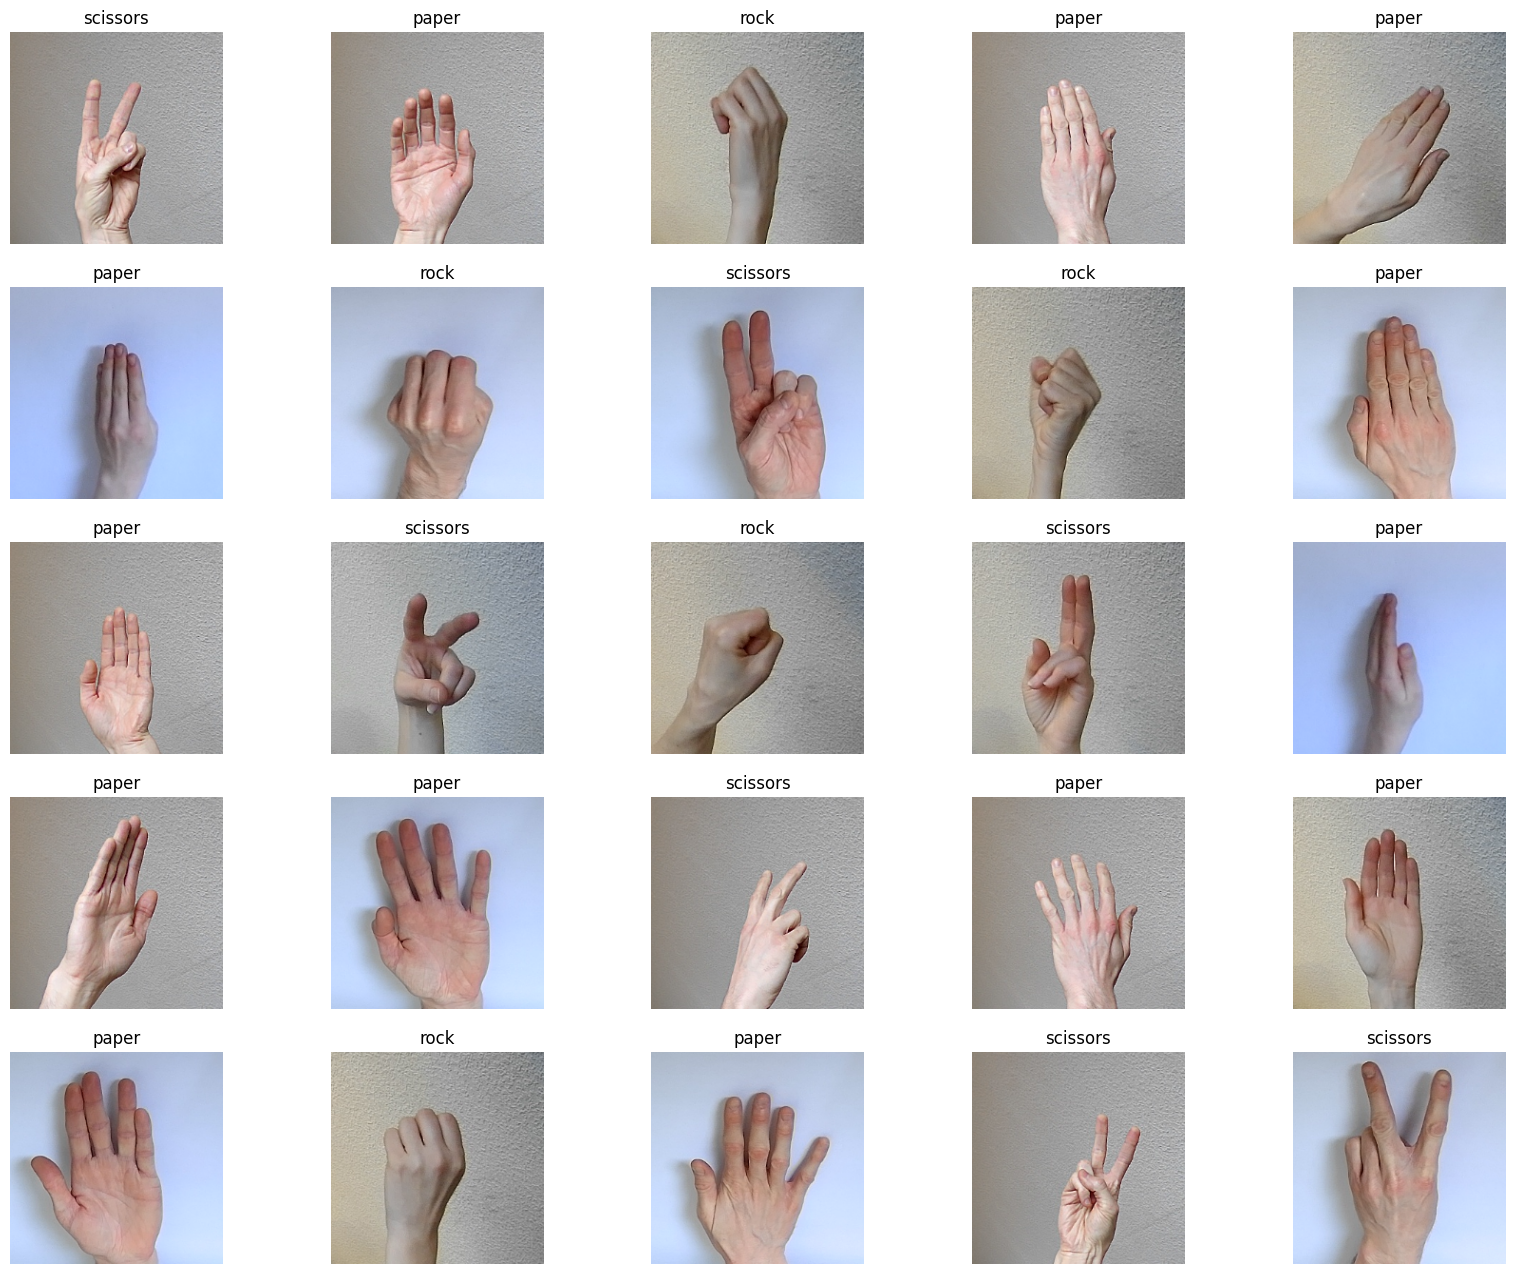

In [123]:
plt.figure(figsize = (20,16))
batch_size = check_images[0].shape[0]

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(check_images[0][i].numpy().astype("uint8"))

    predicted_class = np.argmax(predictions[i])

    plt.title(rps_map[predicted_class])
    plt.axis("off")

plt.show()

# Conclusion:

The model's performance was evaluated by monitoring training and validation accuracy and loss during the training process, and by visually inspecting predictions on test images. The model proved to be highly effective, quickly achieving a low loss value of 0.0039 for training and 0.0116 for testing, demonstrating its strong ability to classify paper, rock, and scissors.